# Lady Foot Locker Stores

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# !pip install geopy

In [3]:
# !pip install folium

In [4]:
df = pd.read_csv('lady_footlocker_locations_feb_2021.csv')
df.head()

,address_line_1,address_line_2,city,name,phone,state,url,zip_code,address,Updated_Date
0,4500 N Oracle Road,Space 115,Tucson,Tucson Mall,(520) 888-0336,AZ,https://stores.ladyfootlocker.com/us/az/tucson...,85705,"4500 N Oracle Road, Space 115, Tucson, AZ, 85705",2021-02-28
1,14200 E Alameda Ave,Space 2055,Aurora,Town Center At Aurora,(303) 363-8068,CO,https://stores.ladyfootlocker.com/us/co/aurora...,80012,"14200 E Alameda Ave, Space 2055, Aurora, CO, 8...",2021-02-28
2,1450 Ala Moana Blvd,Space 1231,Honolulu,Ala Moana Center,(808) 942-1071,HI,https://stores.ladyfootlocker.com/us/hi/honolu...,96814,"1450 Ala Moana Blvd, Space 1231, Honolulu, HI,...",2021-02-28
3,96 River Oaks Dr,NaN,Calumet City,River Oaks Center,(708) 868-6229,IL,https://stores.ladyfootlocker.com/us/il/calume...,60409,"96 River Oaks Dr, Calumet City, IL, 60409",2021-02-28
4,6401 Bluebonnet Blvd,Space 2114,Baton Rouge,Mall Of Louisiana,(225) 767-2198,LA,https://stores.ladyfootlocker.com/us/la/baton-...,70836,"6401 Bluebonnet Blvd, Space 2114, Baton Rouge,...",2021-02-28


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   address_line_1  59 non-null     object
 1   address_line_2  37 non-null     object
 2   city            59 non-null     object
 3   name            59 non-null     object
 4   phone           59 non-null     object
 5   state           57 non-null     object
 6   url             59 non-null     object
 7   zip_code        59 non-null     int64 
 8   address         59 non-null     object
 9   Updated_Date    59 non-null     object
dtypes: int64(1), object(9)
memory usage: 4.7+ KB


In [6]:
df.shape

(59, 10)

In [7]:
df['zip_code'] = df['zip_code'].astype(str)

In [8]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [12]:
geolocator = Nominatim(user_agent='my geocoder')
geocode = RateLimiter(geolocator.geocode, min_delay_seconds = 2, max_retries=0)
df['point'] = df['address'].apply(geocode)

In [13]:
df['point'] = df['point'].apply(lambda x: (x.latitude, x.longitude) if x else np.nan)

In [14]:
df['point'].fillna((df['zip_code'] + ' ' + df['city']).apply(geocode).apply(lambda x: (x.latitude, x.longitude)), inplace = True)

In [16]:
df.head()

,address_line_1,address_line_2,city,name,phone,state,url,zip_code,address,Updated_Date,point
0,4500 N Oracle Road,Space 115,Tucson,Tucson Mall,(520) 888-0336,AZ,https://stores.ladyfootlocker.com/us/az/tucson...,85705,"4500 N Oracle Road, Space 115, Tucson, AZ, 85705",2021-02-28,"(32.2228765, -110.9748477)"
1,14200 E Alameda Ave,Space 2055,Aurora,Town Center At Aurora,(303) 363-8068,CO,https://stores.ladyfootlocker.com/us/co/aurora...,80012,"14200 E Alameda Ave, Space 2055, Aurora, CO, 8...",2021-02-28,"(39.729432, -104.8319196)"
2,1450 Ala Moana Blvd,Space 1231,Honolulu,Ala Moana Center,(808) 942-1071,HI,https://stores.ladyfootlocker.com/us/hi/honolu...,96814,"1450 Ala Moana Blvd, Space 1231, Honolulu, HI,...",2021-02-28,"(21.304547, -157.8556764)"
3,96 River Oaks Dr,NaN,Calumet City,River Oaks Center,(708) 868-6229,IL,https://stores.ladyfootlocker.com/us/il/calume...,60409,"96 River Oaks Dr, Calumet City, IL, 60409",2021-02-28,"(41.6010821, -87.5581579)"
4,6401 Bluebonnet Blvd,Space 2114,Baton Rouge,Mall Of Louisiana,(225) 767-2198,LA,https://stores.ladyfootlocker.com/us/la/baton-...,70836,"6401 Bluebonnet Blvd, Space 2114, Baton Rouge,...",2021-02-28,"(30.387688478432157, -91.08695006192693)"


In [17]:
df[['latitude', 'longitude']] = pd.DataFrame(df['point'].to_list(), index=df.index)

In [18]:
df.head()

,address_line_1,address_line_2,city,name,phone,state,url,zip_code,address,Updated_Date,point,latitude,longitude
0,4500 N Oracle Road,Space 115,Tucson,Tucson Mall,(520) 888-0336,AZ,https://stores.ladyfootlocker.com/us/az/tucson...,85705,"4500 N Oracle Road, Space 115, Tucson, AZ, 85705",2021-02-28,"(32.2228765, -110.9748477)",32.222876,-110.974848
1,14200 E Alameda Ave,Space 2055,Aurora,Town Center At Aurora,(303) 363-8068,CO,https://stores.ladyfootlocker.com/us/co/aurora...,80012,"14200 E Alameda Ave, Space 2055, Aurora, CO, 8...",2021-02-28,"(39.729432, -104.8319196)",39.729432,-104.831920
2,1450 Ala Moana Blvd,Space 1231,Honolulu,Ala Moana Center,(808) 942-1071,HI,https://stores.ladyfootlocker.com/us/hi/honolu...,96814,"1450 Ala Moana Blvd, Space 1231, Honolulu, HI,...",2021-02-28,"(21.304547, -157.8556764)",21.304547,-157.855676
3,96 River Oaks Dr,NaN,Calumet City,River Oaks Center,(708) 868-6229,IL,https://stores.ladyfootlocker.com/us/il/calume...,60409,"96 River Oaks Dr, Calumet City, IL, 60409",2021-02-28,"(41.6010821, -87.5581579)",41.601082,-87.558158
4,6401 Bluebonnet Blvd,Space 2114,Baton Rouge,Mall Of Louisiana,(225) 767-2198,LA,https://stores.ladyfootlocker.com/us/la/baton-...,70836,"6401 Bluebonnet Blvd, Space 2114, Baton Rouge,...",2021-02-28,"(30.387688478432157, -91.08695006192693)",30.387688,-91.086950


In [22]:
df.to_csv('cleaned.csv', index = False)

In [24]:
cleaned_df = pd.read_csv('cleaned.csv')
cleaned_df.head()

,address_line_1,address_line_2,city,name,phone,state,url,zip_code,address,Updated_Date,point,latitude,longitude
0,4500 N Oracle Road,Space 115,Tucson,Tucson Mall,(520) 888-0336,AZ,https://stores.ladyfootlocker.com/us/az/tucson...,85705,"4500 N Oracle Road, Space 115, Tucson, AZ, 85705",2021-02-28,"(32.2228765, -110.9748477)",32.222876,-110.974848
1,14200 E Alameda Ave,Space 2055,Aurora,Town Center At Aurora,(303) 363-8068,CO,https://stores.ladyfootlocker.com/us/co/aurora...,80012,"14200 E Alameda Ave, Space 2055, Aurora, CO, 8...",2021-02-28,"(39.729432, -104.8319196)",39.729432,-104.831920
2,1450 Ala Moana Blvd,Space 1231,Honolulu,Ala Moana Center,(808) 942-1071,HI,https://stores.ladyfootlocker.com/us/hi/honolu...,96814,"1450 Ala Moana Blvd, Space 1231, Honolulu, HI,...",2021-02-28,"(21.304547, -157.8556764)",21.304547,-157.855676
3,96 River Oaks Dr,NaN,Calumet City,River Oaks Center,(708) 868-6229,IL,https://stores.ladyfootlocker.com/us/il/calume...,60409,"96 River Oaks Dr, Calumet City, IL, 60409",2021-02-28,"(41.6010821, -87.5581579)",41.601082,-87.558158
4,6401 Bluebonnet Blvd,Space 2114,Baton Rouge,Mall Of Louisiana,(225) 767-2198,LA,https://stores.ladyfootlocker.com/us/la/baton-...,70836,"6401 Bluebonnet Blvd, Space 2114, Baton Rouge,...",2021-02-28,"(30.387688478432157, -91.08695006192693)",30.387688,-91.086950


In [ ]:
# import folium
# from folium.plugins import MarkerCluster

In [ ]:
# m = folium.Map(location = df[['latitude', 'longitude']].mean().to_list(), zoom_start=3)

# for i, row in df.iterrows():
#     location = (row['latitude'], row['longitude'])
#     folium.Marker(location = location, popup = row['state']).add_to(m)

# m

### Top 5 states by number of stores

In [72]:
top5 = cleaned_df.groupby('state')['name'].count().sort_values(ascending = False).nlargest(5)

In [73]:
top5

state
TX    9
CA    8
NJ    6
GA    5
NY    4
Name: name, dtype: int64

<AxesSubplot:title={'center':'Top 5 states'}, xlabel='Number of Foot Locker Stores', ylabel='state'>

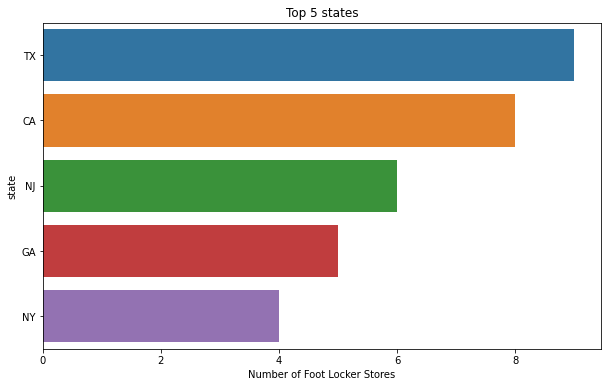

In [74]:
fig = plt.figure(figsize = (10, 6))
plt.title('Top 5 states')
plt.xlabel('Number of Foot Locker Stores')
sns.barplot(x = top5.values, y = top5.index, orient='h')

In [28]:
# !pip install plotly

### GeoMap for the Locations 

In [48]:
import plotly
import plotly.graph_objs as go
import plotly.express as px

In [59]:
data = go.Scattergeo(lat = cleaned_df['latitude'], lon = cleaned_df['longitude'], mode = 'markers', marker=dict(symbol ='triangle-up', size=10, color='blue'))
layout = dict(title = 'Foot Locker Stores in USA',
              geo_scope = 'usa'
             )
fig = go.Figure(data = [data], layout = layout)
fig.show()

In [61]:
cleaned_df.isna().sum()

address_line_1     0
address_line_2    22
city               0
name               0
phone              0
state              2
url                0
zip_code           0
address            0
Updated_Date       0
point              0
latitude           0
longitude          0
dtype: int64

In [75]:
cleaned_df.tail()

,address_line_1,address_line_2,city,name,phone,state,url,zip_code,address,Updated_Date,point,latitude,longitude
54,3393 Peachtree Rd Ne,Space 2016,Atlanta,Lenox Square Mall,(404) 266-0107,GA,https://stores.ladyfootlocker.com/us/ga/atlant...,30326,"3393 Peachtree Rd Ne, Space 2016, Atlanta, GA,...",2021-02-28,"(33.84901590182325, -84.35903519514736)",33.849016,-84.359035
55,1009 Garden State Plaza,NaN,Paramus,Westfield Garden State Plaza,(201) 843-2605,NJ,https://stores.ladyfootlocker.com/us/nj/paramu...,7652,"1009 Garden State Plaza, Paramus, NJ, 07652",2021-02-28,"(40.9189853, -74.0794263)",40.918985,-74.079426
56,700 Paramus Park,Ste 1021,Paramus,Paramus Park Mall,(201) 261-9118,NJ,https://stores.ladyfootlocker.com/us/nj/paramu...,7652,"700 Paramus Park, Ste 1021, Paramus, NJ, 07652",2021-02-28,"(42.7268986, -83.4145584)",42.726899,-83.414558
57,400 Calle Betances,NaN,Caguas,Las Catalinas Mall,(787) 745-0560,NaN,https://stores.ladyfootlocker.com//pr/pr/carol...,725,"400 Calle Betances , Caguas , , 00725",2021-02-28,"(18.2344839, -66.0375248)",18.234484,-66.037525
58,200 Ave Fragoso,NaN,Carolina,Plaza Carolina,(787) 752-4460,NaN,https://stores.ladyfootlocker.com//pr/pr/cagua...,983,"200 Ave Fragoso, Carolina , , 00983",2021-02-28,"(35.8534714, -79.0720386)",35.853471,-79.072039
